__Assignment - Week 3__

__Name__: Runze Li

__net id__: rl50xx

First, we load the dataset. After preprocessing and balancing, we use the Logistic Regression model to classify Probe vs. Not Probe classes with all features. We can summarize the following table using L1 and L2 Regularization:

|Regularization|Training Accuracy|Testing Accuracy|
|:--:|:--:|:--:|
|None|98.47%|98.60%|
|L1|98.44%|98.60%|
|L2|98.47%|98.60%|

We can observe the accuracy of the model on the training set is lower than the testing set, which can be seen that the model has overfitted to a certain extent.

What's more, we find that `diff_srv_rate`, `flag`, `srv_count`, `dst_host_srv_diff_host_rate` and `service` have the largest weights in absolute value, which are potentially most informative features for the trained model.

At the same time, we try different strength for L2 regularization and get the accuracy:

|Strength of L2|Training Accuracy|Testing Accuracy|
|:--:|:--:|:--:|
|0.001|94.82%|96.22%|
|0.01|97.83%|98.41%|
|0.1|98.35%|98.60%|
|1|98.47%|98.60%|
|10|98.49%|98.53%|

The result shows that as the regularization strength increases, the model's ability to generalize might improve initially but then start to degrade due to potential underfitting. Conversely, as the regularization strength decreases, the model may start to overfit the training data, leading to a decrease in test accuracy.

In [1]:
# Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

### Step1. Become familiar with Become familiar with Scikit-Learn's logistic regression model.

### Step2. Download KDD99Cup dataset

The Website of Kddcup99: [https://datahub.io/machine-learning/kddcup99](https://datahub.io/machine-learning/kddcup99)

In [2]:
# Load data
df = pd.read_csv('kddcup99_csv.csv')

# Display original data
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


### Step3. Using the Scikit-Learn Library, train the Logistic Regression model to classify Probe vs. Not Probe classes using all available features. 

Probe class consists of all probing attacks __(ipsweep probe, nmap probe, portsweep probe and satan probe)__. Non probe class consists of every other attack in the dataset: [http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types](http://kdd.ics.uci.edu/databases/kddcup99/training_attack_types)

Make sure you __split your data into train and test sets__. In general, 80% for training 20% for testing is a good split.

#### Preprocessing features

In the data, we found that some data are __object-type features__. For these features, we need to identify and use __LabelEncoder__ to encode, convert the type value to an integer value and return the corresponding column

In [3]:
# Get the type of each feature
print("Feature data types:")
print(df.dtypes)

Feature data types:
duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_s

In [4]:
from sklearn.preprocessing import LabelEncoder

objectFeatures = ['protocol_type', 'service', 'flag']
for feature in objectFeatures:
    labelEncoder = LabelEncoder()
    df[feature] = labelEncoder.fit_transform(df[feature])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal


#### Preprocessing label

Probe class consists of __ipsweep probe, nmap probe, portsweep probe and satan probe__. Non probe class consists of every other attack. We need to specify the probe class as 1 and others as 0

In [5]:
# Probe class consists of ipsweep probe, nmap probe, portsweep probe and satan probe.
probe = ['ipsweep', 'nmap', 'portsweep', 'satan']

def find_probe(x):
    if x in probe:
        return 1
    else:
        return 0

In [6]:
df['label'] = df['label'].apply(find_probe)

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,1,22,9,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,0
1,0,1,22,9,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,0
2,0,1,22,9,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
3,0,1,22,9,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,0
4,0,1,22,9,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,0


#### Balance data

The dataset given is highly imbalanced and we will need to under sample the majority class to make the dataset balanced

In [7]:
from imblearn.under_sampling import RandomUnderSampler
randomUnderSampler = RandomUnderSampler()

In [8]:
y = df['label']
X = df.drop(columns=['label'])

In [9]:
from collections import Counter
X, y = randomUnderSampler.fit_resample(X, y)
# print(X)
print(Counter(y))

Counter({0: 4107, 1: 4107})


#### Split  data into train(80%) and test(20%) sets.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train = scale(X_train)
X_test = scale(X_test)

#### Train Logistic Regression model and get the prediction accuracy

In [11]:
logisticRegression = LogisticRegression()
logisticRegression.fit(X_train, y_train)

LogisticRegression()

### Step4. Summarize your results. 

#### What is the training accuracy and testing accuracy??

In [12]:
y_train_pred = logisticRegression.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = logisticRegression.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

Training accuracy: 0.9847816161923604
Testing accuracy: 0.9860012172854534


#### Do you think your model overfits?

In [13]:
from sklearn.metrics import log_loss

train_loss = log_loss(y_train, y_train_pred)
print("Training log loss:", train_loss)

test_loss = log_loss(y_test, y_test_pred)
print("Testing log loss:", test_loss)

Training log loss: 0.5485261511051159
Testing log loss: 0.5045672720326809


In machine learning, we can observe the accuracy and the error of the model on the training set and validation set to determine whether the model is overfitting. 

We can use the `log_loss` function to calculate the log loss. We found that the model accuracy on the training set was lower than the test set, and the log loss of the training set was higher than the test set. Therefore, it can be seen that __the model has overfitted to a certain extent.__

#### How many iteration did it take to converge?

In [14]:
num_iterations = logisticRegression.n_iter_
print("Number of iterations required for model convergence:", num_iterations)

Number of iterations required for model convergence: [80]


### Step5. Take a look at the trained model parameters. 

#### Which features have the largest weights in absolute value?

In [15]:
feature_names = df.columns.tolist()

coefficients = logisticRegression.coef_[0]
abs_coefficients = np.abs(coefficients)

max_weight_indices = abs_coefficients.argsort()[-5:][::-1]

largest_weights = {'Feature': [feature_names[idx] for idx in max_weight_indices],
        'Weight':  [coefficients[idx]  for idx in max_weight_indices]}
largest_weights = pd.DataFrame(largest_weights)

print("Top 5 features:")
print(largest_weights)

Top 5 features:
                       Feature    Weight
0                diff_srv_rate  3.708349
1                         flag  2.686034
2                    srv_count -2.079660
3  dst_host_srv_diff_host_rate  1.852931
4                      service  1.794949


we find that `diff_srv_rate`, `flag`, `srv_count`, `dst_host_srv_diff_host_rate` and `service` have the largest weights in absolute value.

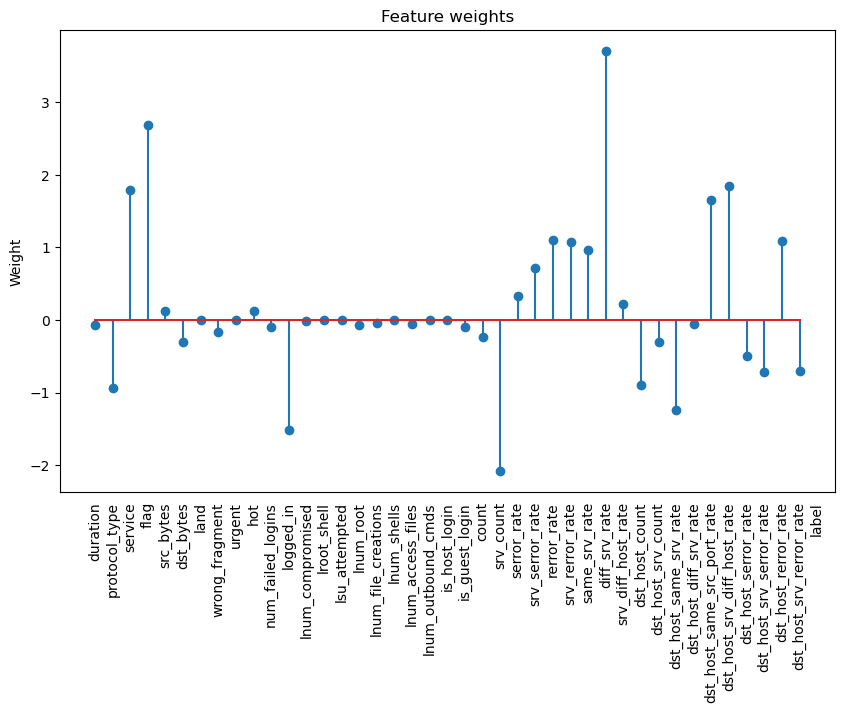

In [16]:
weight = logisticRegression.coef_
weight = weight.flatten()
plt.figure(figsize=(10, 6))
plt.stem(weight)
plt.title("Feature weights")
plt.ylabel("Weight")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.show()

#### These are potentially most informative features for the trained model. Do they make sense? Why?

These features can be considered to be the most informative features to some extent. In the logistic regression model, the weights of features represent their contribution to the prediction target. Therefore, features with higher weights are generally considered to be the most influential features on model predictions.

### Step6. Train model with L1 and L2 regularization. Compare the accuracies for L1 and L2 and plot the feature weights.

#### Train model with L1 and L2 regularzation and compare the accuracies for L1 and L2

In [17]:
l1_logisticRegression = LogisticRegression(penalty='l1', solver='liblinear')
l1_logisticRegression.fit(X_train, y_train)

print("L1 regularization")

y_train_pred = l1_logisticRegression.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = l1_logisticRegression.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

L1 regularization
Training accuracy: 0.9844772485162075
Testing accuracy: 0.9860012172854534


In [18]:
l2_logisticRegression = LogisticRegression(penalty='l2', solver='liblinear')
l2_logisticRegression.fit(X_train, y_train)

print("L2 regularization")

y_train_pred = l2_logisticRegression.predict(X_train)
train_accuracy = np.mean(y_train_pred == y_train)
print("Training accuracy:", train_accuracy)

y_test_pred = l2_logisticRegression.predict(X_test)
test_accuracy = np.mean(y_test_pred == y_test)
print("Testing accuracy:", test_accuracy)

L2 regularization
Training accuracy: 0.9847816161923604
Testing accuracy: 0.9860012172854534


#### Find the top 5 heaviest weights(features) in the L1 and L2 regularization

In [19]:
l1_coefficients = l1_logisticRegression.coef_[0]
l1_abs_coefficients = np.abs(l1_coefficients)

l1_max_weight_indices = l1_abs_coefficients.argsort()[-5:][::-1]

l1_largest_weights = {'Feature': [feature_names[idx] for idx in l1_max_weight_indices],
        'Weight':  [l1_coefficients[idx]  for idx in l1_max_weight_indices]}
l1_largest_weights = pd.DataFrame(l1_largest_weights)

print("Top 5 features of L1 regularization:")
print(l1_largest_weights)

Top 5 features of L1 regularization:
                       Feature    Weight
0                diff_srv_rate  4.030415
1                         flag  2.945825
2                    srv_count -2.341596
3  dst_host_srv_diff_host_rate  1.966890
4                      service  1.936232


In [20]:
l2_coefficients = l2_logisticRegression.coef_[0]
l2_abs_coefficients = np.abs(l2_coefficients)

l2_max_weight_indices = l2_abs_coefficients.argsort()[-5:][::-1]

l2_largest_weights = {'Feature': [feature_names[idx] for idx in l2_max_weight_indices],
        'Weight':  [l2_coefficients[idx]  for idx in l2_max_weight_indices]}
l2_largest_weights = pd.DataFrame(l2_largest_weights)

print("Top 5 features of L2 regularization:")
print(l2_largest_weights)

Top 5 features of L2 regularization:
                       Feature    Weight
0                diff_srv_rate  3.711345
1                         flag  2.687705
2                    srv_count -2.072971
3  dst_host_srv_diff_host_rate  1.855834
4                      service  1.795846


#### Plot the feature weights.

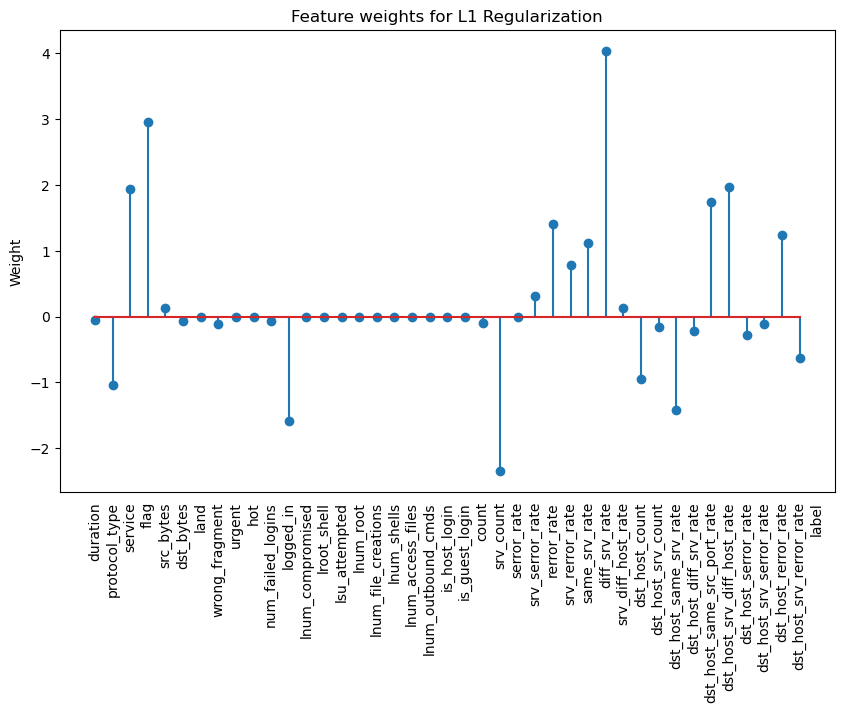

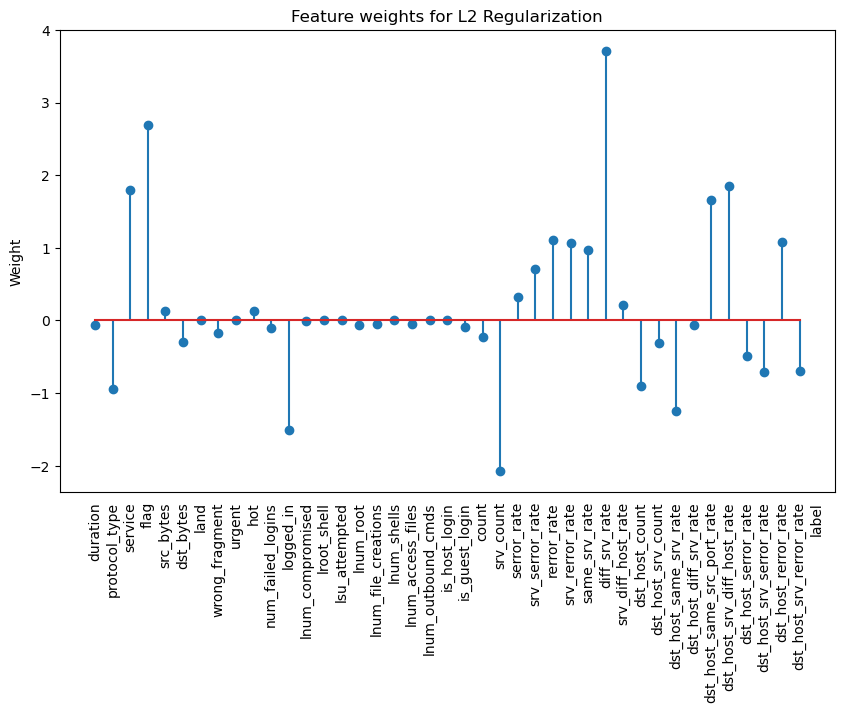

In [21]:
l1_weight = l1_logisticRegression.coef_
l1_weight = l1_weight.flatten()
plt.figure(figsize=(10, 6))
plt.stem(l1_weight)
plt.title("Feature weights for L1 Regularization")
# plt.xlabel("Feature")
plt.ylabel("Weight")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)  # 隐藏刻度的文本标签
plt.show()

l2_weight = l2_logisticRegression.coef_
l2_weight = l2_weight.flatten()
plt.figure(figsize=(10, 6))
plt.stem(l2_weight)
plt.title("Feature weights for L2 Regularization")
# plt.xlabel("Feature")
plt.ylabel("Weight")
plt.xticks(range(len(feature_names)), feature_names, rotation=90)
plt.gca().tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)  # 隐藏刻度的文本标签
plt.show()

### Try different strengths for L2 regularization. (You can use values .001, .01,.1,1,10 etc.)  Show how the train and test accuracy varies with different regularization strengths. Explain your results.

Strength: 0.001
Training accuracy: 0.9482574950540252
Testing accuracy: 0.9622641509433962
Strength: 0.01
Training accuracy: 0.9783898949931518
Testing accuracy: 0.9841752891052952
Strength: 0.1
Training accuracy: 0.9835641454877492
Testing accuracy: 0.9860012172854534
Strength: 1
Training accuracy: 0.9847816161923604
Testing accuracy: 0.9860012172854534
Strength: 10
Training accuracy: 0.9849338000304367
Testing accuracy: 0.985392574558734


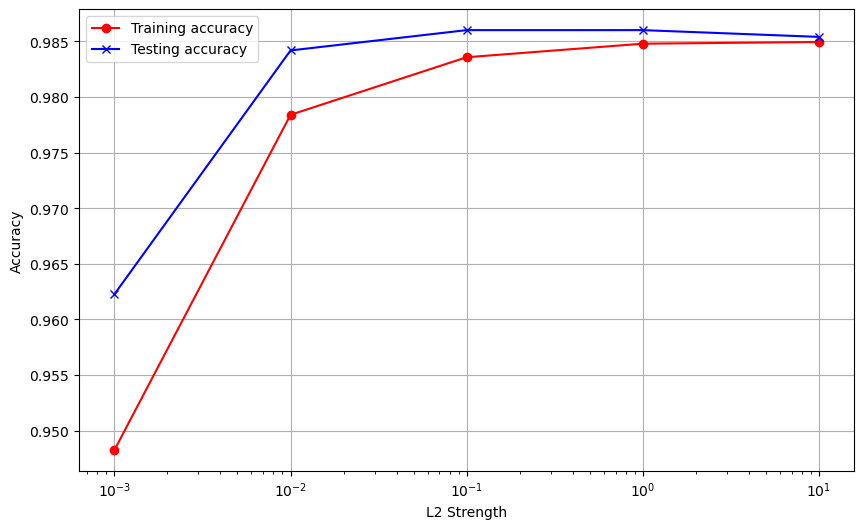

In [22]:
strengths = [0.001, 0.01, 0.1, 1, 10]
train_accuracies = []
test_accuracies = []

for strength in strengths:
    l2_model = LogisticRegression(penalty='l2', C=strength, solver='liblinear')
    l2_model.fit(X_train, y_train)
    print('Strength:', str(strength))
    
    y_train_pred = l2_model.predict(X_train)
    train_accuracy = np.mean(y_train_pred == y_train)
    train_accuracies.append(train_accuracy)
    print('Training accuracy:', train_accuracy)

    y_test_pred = l2_model.predict(X_test)
    test_accuracy = np.mean(y_test_pred == y_test)
    test_accuracies.append(test_accuracy)
    print('Testing accuracy:', test_accuracy)

# Plot the train and test accuracies vs regularization strengths
plt.figure(figsize=(10, 6))
plt.plot(strengths, train_accuracies, color='red', marker='o', label='Training accuracy')
plt.plot(strengths, test_accuracies, color='blue', marker='x', label='Testing accuracy')
plt.xscale('log')
plt.xlabel('L2 Strength')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

To try different strengths for L2 regularization and observe how the train and test accuracy vary with different regularization strengths, you can train logistic regression models with varying values of the regularization, which is the inverse of regularization strength. Smaller values of regularization correspond to stronger regularization.

For each model, we calculate and store the train and test accuracies and we plot the train and test accuracies against the regularization strengths on a logarithmic scale.

The result shows how the train and test accuracies vary with different strengths of L2 regularization. We observe that as the regularization strength increases, the model's ability to generalize might improve initially but then start to degrade due to underfitting. Conversely, as the regularization strength decreases, the model may start to overfit the training data, leading to a decrease in test accuracy. 